<a href="https://colab.research.google.com/github/MananPoojara/MananPoojara/blob/main/pr11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving studentporcsv__2024_10_16_07_51_52.csv to studentporcsv__2024_10_16_07_51_52 (3).csv
Dataset preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[

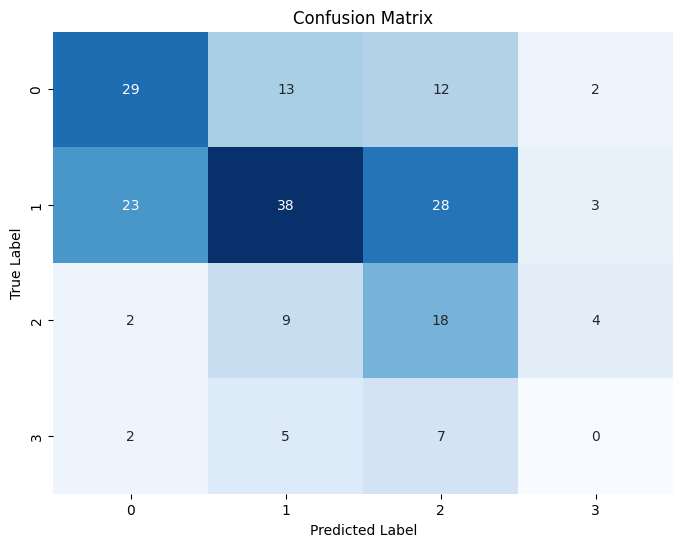

<Figure size 1000x800 with 0 Axes>

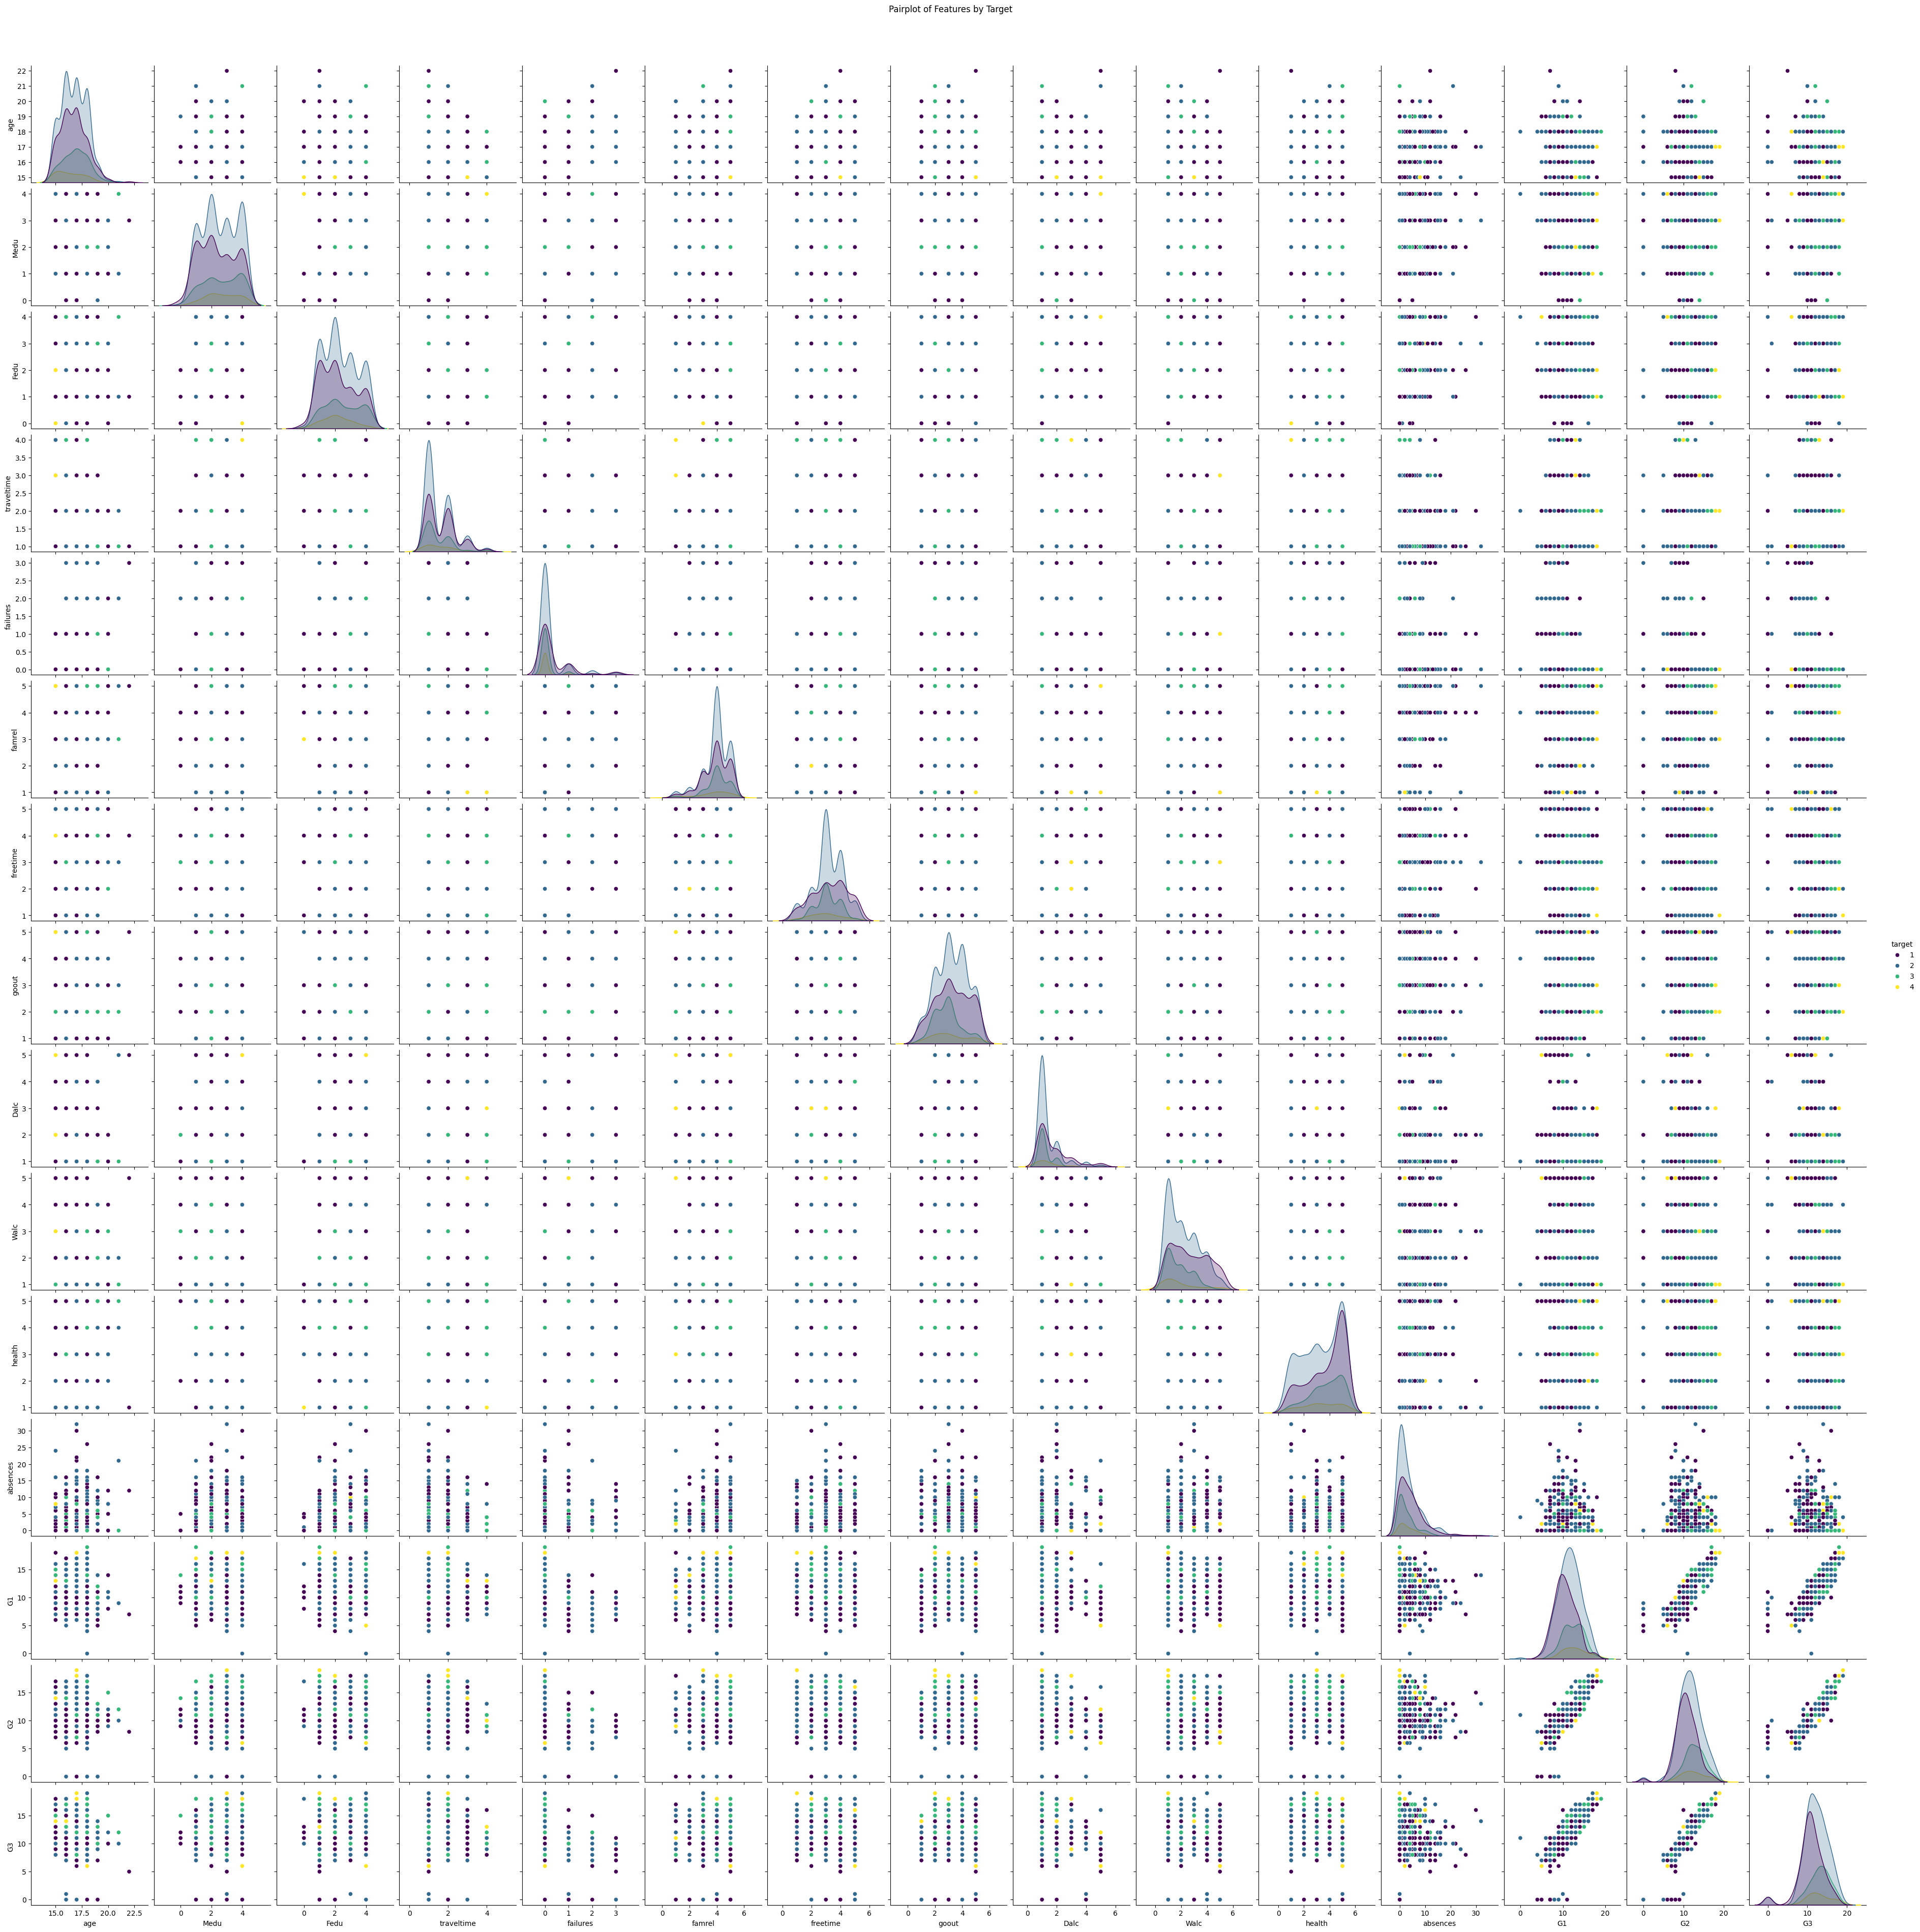

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from google.colab import files
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for categorical feature handling

# Upload the file
uploaded = files.upload()  # This will allow you to upload a file

# Load the uploaded CSV file into a DataFrame
# Assuming the file has been uploaded and is named 'yourfile.csv'
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Preprocess the data (this example assumes a simple classification dataset)
# Here, we assume the target column is named "target"
# Adjust as necessary for your dataset's specific column names
if 'target' not in data.columns:
    print("Please make sure your dataset has a column named 'target'")
else:
    X = data.drop('target', axis=1)  # Features
    y = data['target']  # Target label

    # Convert categorical features to numerical using Label Encoding
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Gaussian Naive Bayes classifier
    nb_model = GaussianNB()

    # Train the model
    nb_model.fit(X_train, y_train)

    # Predict the target on the test set
    y_pred = nb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Accuracy of Naive Bayes Model: {accuracy:.2f}")
    print(f"RMSE of Naive Bayes Model: {rmse:.2f}")

    # Detailed Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Visualize the dataset (Pairplot of features)
    # Note: Pairplot might not be ideal for datasets with many features
    # Consider using other visualization techniques for high-dimensional data
    plt.figure(figsize=(10, 8))
    sns.pairplot(data, hue='target', palette='viridis')
    plt.suptitle("Pairplot of Features by Target", y=1.02)
    plt.show()